## Multiple Linear Regression

1.In linear regression model we have one dependent and one independent variable <br>
2.Multiple regression model involves multiple predictors or independent variable and one dependent variable<br>
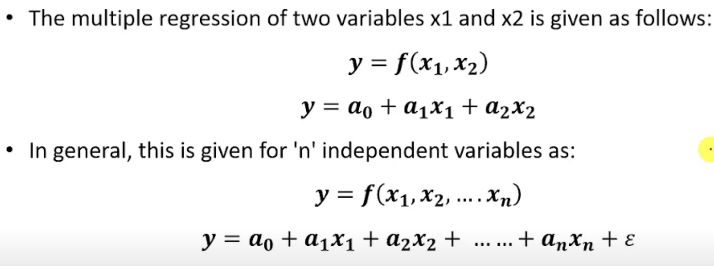
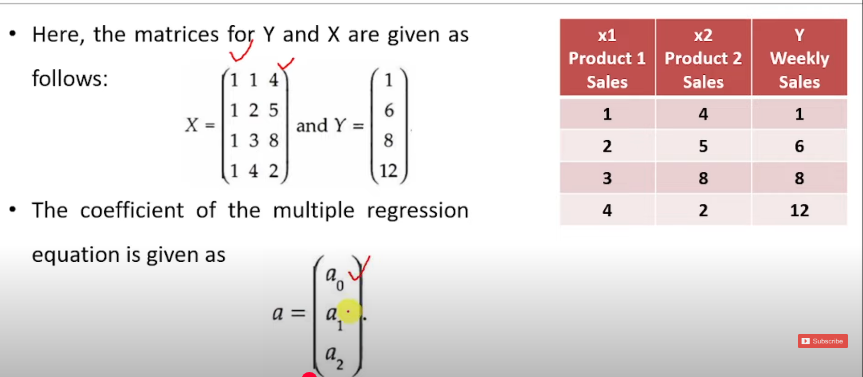
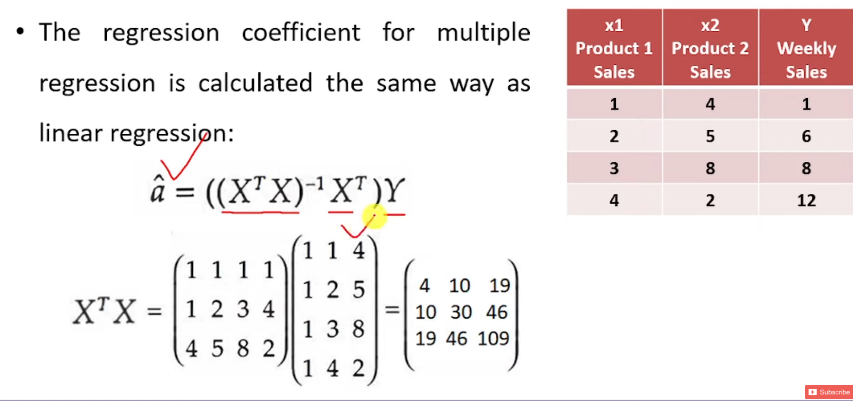
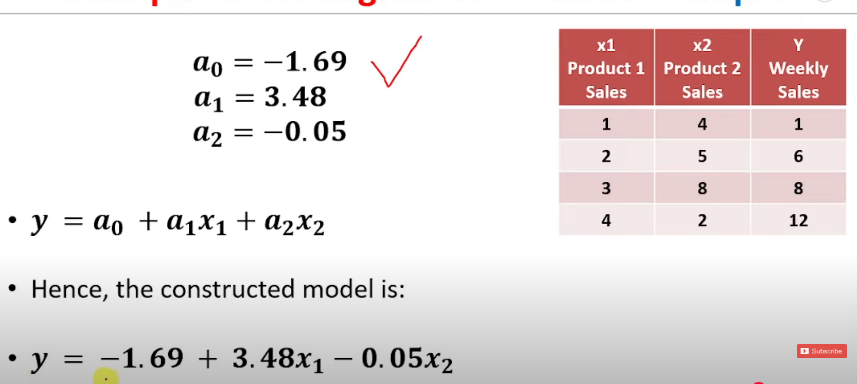

In [2]:
# Importing necessary dependencies
import numpy as np
from sklearn.datasets import load_diabetes

In [3]:
# Loading the datasets
X,y = load_diabetes(return_X_y=True)

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Using Sklearn's Linear Regression

In [7]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [10]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression

In [11]:
# Making a model
reg = LinearRegression()

In [12]:
# Fitting or training the model
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting
y_pred = reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
# Measuring the r2 score
r2_score(y_test, y_pred)

0.4399338661568968

In [16]:
# Coefficients
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [17]:
# Intercepts
reg.intercept_

151.88331005254167

### Making our own Linear Regression Class

In [18]:
class MulLR:

    def __init__(self):
        
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
    
        # Add a column of ones to X_train for the intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculate the coefficients using the Normal Equation
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        # Extract the intercept and coefficients
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        
        # Calculate the predictions
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [19]:
# Creating a model
lr = MulLR()

In [20]:
# Fitting or training the model
lr.fit(X_train, y_train)

In [23]:
# Predictions
y_pred = lr.predict(X_test)

In [24]:
# Measuring the r2 score
r2_score(y_test, y_pred)

0.4399338661568972

In [25]:
# Coefficients
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [26]:
# Intercepts
lr.intercept_

151.8833100525417

**Conclusions** <br>
A custom Multiple Linear Regression model was built and compared to scikit-learn's. Identical R², coefficients, and intercepts were achieved. This validates the custom model's accuracy and demonstrates successful implementation of the Normal Equation.